In [2]:
from utils import initialize_enc_dec, create_coord_map
from dataset import ReconstructionDataset
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
Z_DIM = 32
DEV = torch.device("mps")

dataset = ReconstructionDataset()

enc, dec = initialize_enc_dec(Z_DIM, DEV)
enc.load_state_dict(torch.load("weights/enc_res_28_epoch_34.pt", map_location="mps"))
dec.load_state_dict(torch.load("weights/dec_res_28_epoch_34.pt", map_location="mps"))

<All keys matched successfully>

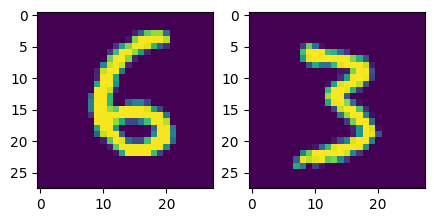

In [4]:
sample_input1 = dataset[126][0]
sample_input2 = dataset[130][0]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 3))
ax = ax.flatten()

ax[0].imshow(sample_input1[0])
ax[1].imshow(sample_input2[0])
plt.show()

In [10]:
features1 = enc(sample_input1.to(DEV))
features2 = enc(sample_input2.to(DEV))
res = 128
inference_coord_map = create_coord_map(res).unsqueeze(0).to(DEV)

feature_diff = features2 - features1
frames = 50
frame_diff = feature_diff / frames

fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
writer = cv2.VideoWriter("outputs/superres_output.avi", fourcc, 15, (res, res), 0)

for i in range(frames):
    output = dec(features1 + i * frame_diff, inference_coord_map).view(res, res)
    writer.write((output.view(res, res).repeat(1, 1).detach().cpu().numpy() * 255).astype(np.uint8))
writer.release()